# Model Dataset Creation 

# Importing the libraries 

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt

# Getting tweet counts

In [2]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAPgYWQEAAAAAjcQ3%2Bt5elA204Ks7I1FN2YfKsS4%3D8t77cwMJwYE9xhwhoxX3IFpvifHfW1qOEXfr0udlm0eCACd9z8"
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

In [3]:
def get_tweet_counts(keyword, start_time, end_time, retweet=False):
    
    if retweet:
        query = f'{keyword} lang:en place:United States'
    else:
        query = f'{keyword} lang:en -is:retweet'
        
    counts = client.get_all_tweets_count(query=query, granularity='day',
                                         start_time=start_time, end_time=end_time)
    
    df = pd.DataFrame(counts.data)
    df = df[["start", "tweet_count"]]
    df["start"] = pd.to_datetime(df["start"]).dt.date
    df.rename({"start":"date"}, axis=1, inplace=True)
    df["keyword"] = keyword
    return df

In [4]:
keywords = ["omicron",
           "omicron ny",
           "booster jab",
           "omicron variant",
           "booster",
           "omicron symptoms",
           "third dose",
           "3rd dose",
           "pfeizer",
           "omicron news",
           "omicron deadly"]

Tweepy runs on a monthly basis. I divided the time periods into three.

In [5]:
nov_df = pd.DataFrame(columns=["date", "tweet_count", "keyword"]) #November-December tweets 

for keyword in keywords:
    nov_df = nov_df.append(get_tweet_counts(keyword=keyword, retweet=False,
                                            start_time="2021-11-15T00:00:00Z", end_time="2021-12-15T00:00:00Z"))
 #Tweets between 15 December - 15 January   
nov_df.reset_index(drop=True, inplace=True)
nov_tweets = pd.DataFrame(nov_df)

In [6]:
nov_df.tail(5)

,date,tweet_count,keyword
325,2021-12-10,430,omicron deadly
326,2021-12-11,523,omicron deadly
327,2021-12-12,553,omicron deadly
328,2021-12-13,755,omicron deadly
329,2021-12-14,788,omicron deadly


In [7]:
nov_tweets = pd.DataFrame(nov_df)

In [13]:
dec_df = pd.DataFrame(columns=["date", "tweet_count", "keyword"]) #December - January  Tweets

for keyword in keywords:
    dec_df = dec_df.append(get_tweet_counts(keyword=keyword, retweet=False,
                                            start_time="2021-12-15T00:00:00Z", end_time="2022-01-15T00:00:00Z"))
 #Tweets between 15 December - 15 January   
dec_df.reset_index(drop=True, inplace=True)
dec_df.tail(50)

,date,tweet_count,keyword
291,2021-12-27,10861,omicron news
292,2021-12-28,12562,omicron news
293,2021-12-29,14795,omicron news
294,2021-12-30,13661,omicron news
295,2021-12-31,12166,omicron news
296,2022-01-01,7533,omicron news
297,2022-01-02,7980,omicron news
298,2022-01-03,12165,omicron news
299,2022-01-04,14102,omicron news
300,2022-01-05,13301,omicron news


In [16]:
jan_df = pd.DataFrame(columns=["date", "tweet_count", "keyword"]) #December - January 23  Tweets (Although I used 21 as dealine because of the other recent data)

for keyword in keywords:
    jan_df = jan_df.append(get_tweet_counts(keyword=keyword, retweet=False,
                                            start_time="2022-01-15T00:00:00Z", end_time="2022-01-24T00:00:00Z"))
 #Tweets between 15 December - 15 January   
jan_df.reset_index(drop=True, inplace=True)
jan_df.tail(50)

,date,tweet_count,keyword
49,2022-01-19,1250,omicron symptoms
50,2022-01-20,1189,omicron symptoms
51,2022-01-21,1104,omicron symptoms
52,2022-01-22,959,omicron symptoms
53,2022-01-23,1015,omicron symptoms
54,2022-01-15,444,third dose
55,2022-01-16,415,third dose
56,2022-01-17,527,third dose
57,2022-01-18,569,third dose
58,2022-01-19,714,third dose


In [18]:
jan_df

,date,tweet_count,keyword
0,2022-01-15,47004,omicron
1,2022-01-16,46395,omicron
2,2022-01-17,50150,omicron
3,2022-01-18,57724,omicron
4,2022-01-19,59552,omicron
...,...,...,...
94,2022-01-19,450,omicron deadly
95,2022-01-20,383,omicron deadly
96,2022-01-21,360,omicron deadly
97,2022-01-22,304,omicron deadly


In [19]:
tweets_concat= pd.concat([nov_df,dec_df,jan_df],axis=0)
tweets_concat.T

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
date,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,...,2022-01-23,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
tweet_count,58,36,50,43,38,29,20,46,36,48,...,5706,527,426,393,411,450,383,360,304,316
keyword,omicron,omicron,omicron,omicron,omicron,omicron,omicron,omicron,omicron,omicron,...,omicron news,omicron deadly,omicron deadly,omicron deadly,omicron deadly,omicron deadly,omicron deadly,omicron deadly,omicron deadly,omicron deadly


In [20]:
omicron = tweets_concat.loc[tweets_concat["keyword"] == "omicron"]
omicron_ny = tweets_concat.loc[tweets_concat["keyword"] == "omicron ny"]
booster = tweets_concat.loc[tweets_concat["keyword"] == "booster"]
booster_jab = tweets_concat.loc[tweets_concat["keyword"] == "booster jab"]
omicron_variant = tweets_concat.loc[tweets_concat["keyword"] == "omicron variant"]
omicron_symptoms = tweets_concat.loc[tweets_concat["keyword"] == "omicron symptoms"]
third_dose = tweets_concat.loc[tweets_concat["keyword"] == "third dose"]
rd_dose = tweets_concat.loc[tweets_concat["keyword"] == "3rd dose"]
pfeizer = tweets_concat.loc[tweets_concat["keyword"] == "pfeizer"]
omicron_news = tweets_concat.loc[tweets_concat["keyword"] == "omicron news"]
omicron_deadly = tweets_concat.loc[tweets_concat["keyword"] == "omicron deadly"]

In [21]:
a=omicron.drop("keyword",axis=1).rename(columns={"tweet_count":"omicron"}).reset_index(drop=True)
b= omicron_ny.drop(["keyword","date"],axis=1).rename(columns={"tweet_count":"omicron ny"}).reset_index(drop=True)
c=booster.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"booster"}).reset_index(drop=True)
d=booster_jab.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"booster jab"}).reset_index(drop=True)
e=omicron_variant.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"omicron variant"}).reset_index(drop=True)  
f=omicron_symptoms.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"omicron symptoms"}).reset_index(drop=True)  
g=third_dose.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"third dose"}).reset_index(drop=True)                                                   
h=rd_dose.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"3rd dose"}).reset_index(drop=True)
i=pfeizer.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"pfeizer"}).reset_index(drop=True)
j=omicron_news.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"omicron news"}).reset_index(drop=True)
k=omicron_deadly.drop(["date","keyword"],axis=1).rename(columns={"tweet_count":"omicron deadly"}).reset_index(drop=True)                                                  
        

In [36]:
final_tweets_df = pd.concat((a,b,c,d,e,f,g,h,i,j,k),axis=1).dropna()
final_tweets_df

,date,omicron,omicron ny,booster,booster jab,omicron variant,omicron symptoms,third dose,3rd dose,pfeizer,omicron news,omicron deadly
0,2021-11-15,58,0,30399,2449,0,0,598,511,20,0,0
1,2021-11-16,36,0,30997,2101,0,0,609,607,21,1,0
2,2021-11-17,50,0,32108,1556,0,0,553,637,23,0,0
3,2021-11-18,43,0,29810,1357,0,0,558,587,25,0,0
4,2021-11-19,38,0,37077,1383,0,0,720,706,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-01-19,59552,133,31202,890,7047,1250,714,720,20,8531,450
66,2022-01-20,53922,118,30634,786,5761,1189,807,907,16,6792,383
67,2022-01-21,52115,131,31301,779,7336,1104,785,848,18,7330,360
68,2022-01-22,40778,116,27145,645,5095,959,631,640,17,5241,304


In [37]:
#getting the totals of keywords everyday 
final_tweets_df['total tweet count'] = final_tweets_df.loc[:, final_tweets_df.columns != 'date'].sum(axis=1)

In [38]:
final_tweets_df #November 15 - January 23 

,date,omicron,omicron ny,booster,booster jab,omicron variant,omicron symptoms,third dose,3rd dose,pfeizer,omicron news,omicron deadly,total tweet count
0,2021-11-15,58,0,30399,2449,0,0,598,511,20,0,0,34035.0
1,2021-11-16,36,0,30997,2101,0,0,609,607,21,1,0,34372.0
2,2021-11-17,50,0,32108,1556,0,0,553,637,23,0,0,34927.0
3,2021-11-18,43,0,29810,1357,0,0,558,587,25,0,0,32380.0
4,2021-11-19,38,0,37077,1383,0,0,720,706,19,0,0,39943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-01-19,59552,133,31202,890,7047,1250,714,720,20,8531,450,110509.0
66,2022-01-20,53922,118,30634,786,5761,1189,807,907,16,6792,383,101315.0
67,2022-01-21,52115,131,31301,779,7336,1104,785,848,18,7330,360,102107.0
68,2022-01-22,40778,116,27145,645,5095,959,631,640,17,5241,304,81571.0


In [39]:
total = final_tweets_df.iloc[: -2]["total tweet count"]
total

0      34035.0
1      34372.0
2      34927.0
3      32380.0
4      39943.0
        ...   
63     95806.0
64    106428.0
65    110509.0
66    101315.0
67    102107.0
Name: total tweet count, Length: 68, dtype: float64

# Apple Mobility Data for USA

In [40]:
apple_new = pd.read_csv("apple_new.csv") #Apple mobility data, last day 21 Jan 2022

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [41]:
apple_new_us = apple_new.loc[apple_new["country"] == "United States"]
apple_new_us.head(3)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,137.72,142.65,163.68,157.16,111.93,73.03,129.22,143.70,145.12,163.65
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,73.82,65.59,73.31,61.91,49.78,57.21,75.22,82.13,78.68,67.72
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,106.46,100.43,119.53,126.00,86.07,86.37,122.54,176.29,152.77,131.77


# Grouping the "driving" "walking" and the "transit" data and taking the mean of all the states

In [42]:
grouped_us_df = apple_new_us.iloc[:, 6:]
grouped_us_df["transportation_type"] = apple_new_us["transportation_type"]
grouped_us_df.head(5)

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,transportation_type
158,100.0,103.06,107.50,106.14,123.62,105.99,82.68,94.99,97.36,100.18,...,142.65,163.68,157.16,111.93,73.03,129.22,143.70,145.12,163.65,driving
159,100.0,106.69,103.75,100.22,89.04,74.85,56.99,75.59,102.35,99.63,...,65.59,73.31,61.91,49.78,57.21,75.22,82.13,78.68,67.72,transit
160,100.0,97.23,79.05,74.77,89.55,88.39,49.30,56.29,66.39,64.08,...,100.43,119.53,126.00,86.07,86.37,122.54,176.29,152.77,131.77,walking
161,100.0,102.35,107.35,105.54,128.97,88.28,82.76,102.46,107.77,107.04,...,127.96,147.46,130.44,107.99,91.85,125.26,129.60,133.46,149.00,driving
162,100.0,100.14,105.95,107.76,101.39,85.79,82.86,126.71,133.77,144.82,...,109.85,112.31,92.52,91.78,121.13,137.06,126.85,125.22,142.13,transit


In [43]:
mean_grouped_us_df = grouped_us_df.groupby("transportation_type", as_index=True).mean()
mean_grouped_us_df.T #US average mobility

transportation_type,driving,transit,walking
2020-01-13,100.000000,100.000000,100.000000
2020-01-14,102.135494,99.925347,102.259517
2020-01-15,102.672297,99.876111,103.368998
2020-01-16,108.623441,98.390417,103.133971
2020-01-17,128.496399,104.524028,124.152182
...,...,...,...
2022-01-17,139.609069,85.232639,140.832200
2022-01-18,144.602129,93.492431,158.729267
2022-01-19,143.997521,92.773507,157.807531
2022-01-20,146.613907,89.871146,152.724329


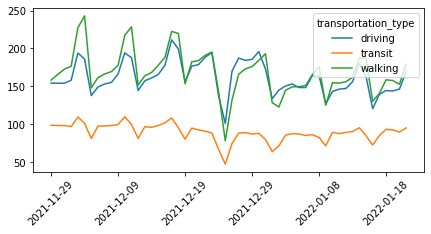

In [44]:
mean_grouped_us_df.T.tail(54).plot(figsize=(7,3));
plt.xticks(rotation=45);

# Dummy for Weekends 

In [45]:
mean_df_grouped = mean_grouped_us_df.T.rename_axis('dates')

In [46]:
mean_df_grouped.index.rename('dates', inplace=True)

In [47]:
mean_df_grouped

transportation_type,driving,transit,walking
dates,,,
2020-01-13,100.000000,100.000000,100.000000
2020-01-14,102.135494,99.925347,102.259517
2020-01-15,102.672297,99.876111,103.368998
2020-01-16,108.623441,98.390417,103.133971
2020-01-17,128.496399,104.524028,124.152182
...,...,...,...
2022-01-17,139.609069,85.232639,140.832200
2022-01-18,144.602129,93.492431,158.729267
2022-01-19,143.997521,92.773507,157.807531


In [48]:
mean_df_grouped.index = pd.to_datetime(mean_df_grouped.index, errors='coerce')
mean_df_grouped["weekend"] = np.where(mean_df_grouped.index.dayofweek > 4, 1, 0)
mean_df_grouped.tail(50)

transportation_type,driving,transit,walking,weekend
dates,,,,
2021-12-03,193.992497,109.681181,227.377138,0
2021-12-04,186.066851,101.495278,242.972236,1
2021-12-05,137.945220,81.362326,148.274097,1
2021-12-06,149.284696,97.755000,161.693757,0
2021-12-07,153.216319,97.875382,166.371878,0
2021-12-08,155.269521,98.433611,169.542093,0
2021-12-09,166.339322,99.827083,177.740018,0
2021-12-10,194.239534,110.076424,217.382970,0
2021-12-11,187.847392,99.874271,228.522343,1


# US Cumulative Death & Cases Data 

In [49]:
dc = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [50]:
cases = dc[664:-3] #last day as 23 Jan 
cases

,date,cases,deaths
664,2021-11-15,47185415,763425
665,2021-11-16,47275900,764871
666,2021-11-17,47390257,766489
667,2021-11-18,47500530,769719
668,2021-11-19,47620178,771721
...,...,...,...
727,2022-01-17,66526927,851283
728,2022-01-18,67705330,854268
729,2022-01-19,68557114,857644
730,2022-01-20,69305598,860316


# Vaccine Data 

In [51]:
vc = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20States.csv")

In [52]:
pd.options.display.max_rows = None
vc = vc[["date","total_boosters"]].iloc[337:-3 , :]  #Cumulative booster shots between 15 November - 23 January

In [53]:
vc

,date,total_boosters
337,2021-11-15,34254930
338,2021-11-16,35254044
339,2021-11-17,36304204
340,2021-11-18,37381979
341,2021-11-19,38641212
342,2021-11-20,39295976
343,2021-11-21,39662837
344,2021-11-22,40782210
345,2021-11-23,41879231
346,2021-11-24,42680064


# Concatenating all the columns for modeling 

In [54]:
#Mobility Data USA
mobility = mean_df_grouped.tail(68).reset_index(drop=True)
mobility

transportation_type,driving,transit,walking,weekend
0,155.021242,99.521319,161.048497,0
1,157.086692,99.774618,168.144937,0
2,158.833792,100.054688,171.351771,0
3,169.836009,102.968646,180.047925,0
4,208.326922,113.331285,219.929141,0
5,200.237978,104.583368,240.946995,1
6,153.727911,84.459722,152.100644,1
7,169.592346,102.241354,172.261270,0
8,188.860554,105.339931,183.394758,0
9,208.926860,102.261181,198.798819,0


In [55]:
cs = dc[664:-3].reset_index(drop=True) #cases deaths data 
cs

,date,cases,deaths
0,2021-11-15,47185415,763425
1,2021-11-16,47275900,764871
2,2021-11-17,47390257,766489
3,2021-11-18,47500530,769719
4,2021-11-19,47620178,771721
5,2021-11-20,47661242,772046
6,2021-11-21,47692614,772169
7,2021-11-22,47851512,773402
8,2021-11-23,47944283,774880
9,2021-11-24,48064175,776516


In [56]:
total = total.reset_index(drop=True)

In [57]:
twt = ft["total tweet count"].reset_index(drop=True)
twt

0      34035.0
1      34372.0
2      34927.0
3      32380.0
4      39943.0
5      30262.0
6      29197.0
7      31329.0
8      30191.0
9      29082.0
10     24437.0
11     87143.0
12    225228.0
13    230145.0
14    299908.0
15    256423.0
16    226220.0
17    210506.0
18    191989.0
19    137337.0
20    117294.0
21    132440.0
22    135203.0
23    182276.0
24    141924.0
25    130285.0
26    121889.0
27    146123.0
28    199433.0
29    200719.0
30    221190.0
31    218010.0
32    231536.0
33    218780.0
34    190583.0
35    262628.0
36    306197.0
37    274192.0
38    234710.0
39    173690.0
40     94369.0
41    110927.0
42    154536.0
43    175586.0
44    193003.0
45    198899.0
46    165832.0
47    101347.0
48    113775.0
49    159769.0
50    195682.0
51    186612.0
52    166984.0
53    164822.0
54    138072.0
55    124393.0
56    147606.0
57    156025.0
58    155157.0
59    143372.0
60    120123.0
61     89628.0
62     86878.0
63     95806.0
64    106428.0
65    110509.0
66    1013

In [58]:
vc = vc.reset_index(drop=True)
vc

,date,total_boosters
0,2021-11-15,34254930
1,2021-11-16,35254044
2,2021-11-17,36304204
3,2021-11-18,37381979
4,2021-11-19,38641212
5,2021-11-20,39295976
6,2021-11-21,39662837
7,2021-11-22,40782210
8,2021-11-23,41879231
9,2021-11-24,42680064


In [59]:
#mobility (mobility)
#tweets(ft)
#cases
#vaccines 

In [60]:
model_df = pd.concat((mobility,total,cs,vc), axis=1)
model_df

,driving,transit,walking,weekend,total tweet count,date,cases,deaths,date,total_boosters
0,155.021242,99.521319,161.048497,0,34035.0,2021-11-15,47185415,763425,2021-11-15,34254930
1,157.086692,99.774618,168.144937,0,34372.0,2021-11-16,47275900,764871,2021-11-16,35254044
2,158.833792,100.054688,171.351771,0,34927.0,2021-11-17,47390257,766489,2021-11-17,36304204
3,169.836009,102.968646,180.047925,0,32380.0,2021-11-18,47500530,769719,2021-11-18,37381979
4,208.326922,113.331285,219.929141,0,39943.0,2021-11-19,47620178,771721,2021-11-19,38641212
5,200.237978,104.583368,240.946995,1,30262.0,2021-11-20,47661242,772046,2021-11-20,39295976
6,153.727911,84.459722,152.100644,1,29197.0,2021-11-21,47692614,772169,2021-11-21,39662837
7,169.592346,102.241354,172.261270,0,31329.0,2021-11-22,47851512,773402,2021-11-22,40782210
8,188.860554,105.339931,183.394758,0,30191.0,2021-11-23,47944283,774880,2021-11-23,41879231
9,208.926860,102.261181,198.798819,0,29082.0,2021-11-24,48064175,776516,2021-11-24,42680064


In [61]:
model_df = model_df.loc[:,~model_df.columns.duplicated()]

In [62]:
model_df = model_df[['date',"weekend","driving","transit","walking","cases","deaths","total_boosters","total tweet count"]]
model_df #checking if I correctly concatenated (Nov 15 - Jan 21)

,date,weekend,driving,transit,walking,cases,deaths,total_boosters,total tweet count
0,2021-11-15,0,155.021242,99.521319,161.048497,47185415,763425,34254930,34035.0
1,2021-11-16,0,157.086692,99.774618,168.144937,47275900,764871,35254044,34372.0
2,2021-11-17,0,158.833792,100.054688,171.351771,47390257,766489,36304204,34927.0
3,2021-11-18,0,169.836009,102.968646,180.047925,47500530,769719,37381979,32380.0
4,2021-11-19,0,208.326922,113.331285,219.929141,47620178,771721,38641212,39943.0
5,2021-11-20,1,200.237978,104.583368,240.946995,47661242,772046,39295976,30262.0
6,2021-11-21,1,153.727911,84.459722,152.100644,47692614,772169,39662837,29197.0
7,2021-11-22,0,169.592346,102.241354,172.261270,47851512,773402,40782210,31329.0
8,2021-11-23,0,188.860554,105.339931,183.394758,47944283,774880,41879231,30191.0
9,2021-11-24,0,208.926860,102.261181,198.798819,48064175,776516,42680064,29082.0


In [63]:
model_df.to_csv('502project.csv')